In [25]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [27]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
135252,-1.099543,0.041243,0.044705,-1.453781,1.070422,0.755505,-1.000477,-0.034361,0.223363,0.511160,0
65690,-1.099543,-0.875367,0.044705,-1.453781,-0.982998,-1.049090,1.051748,1.333116,0.757866,0.058010,0
172597,0.957913,0.117558,0.044705,0.119618,-0.982998,0.755505,1.051748,0.611093,-1.647398,-0.199184,1
107834,-1.099543,0.183753,0.044705,0.119618,-0.982998,0.051533,1.051748,-0.456781,-1.647398,1.478698,0
125667,0.957913,-1.140147,0.044705,1.614346,-0.982998,-1.049090,-1.000477,-0.717398,0.910581,0.817343,0


In [15]:
# Mengecek Data Kosong
df.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Feature Selection**

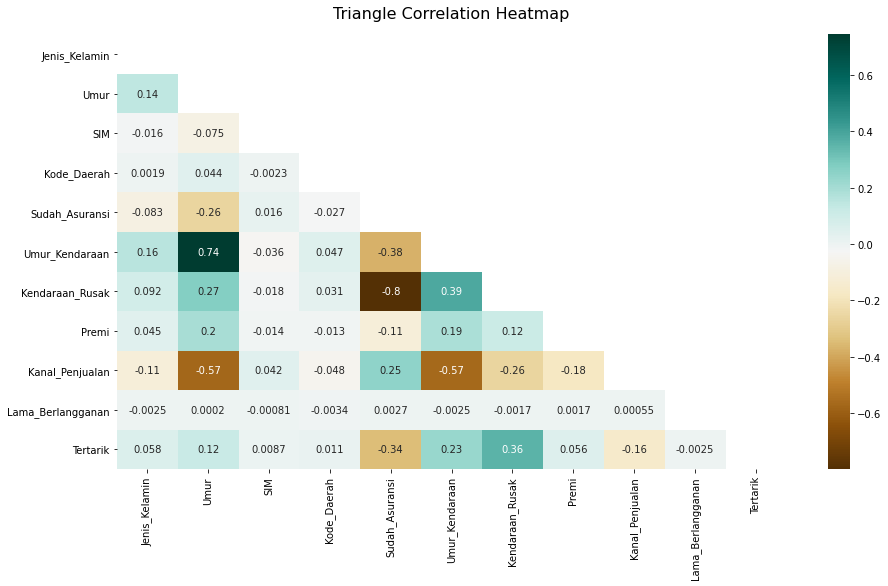

In [28]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()


In [16]:
df = df[['Umur', 'Kanal_Penjualan']]
df.head()

,Umur,Kanal_Penjualan
0,-0.544392,0.757866
1,0.647118,-1.590130
2,-1.140147,0.910581
3,0.779508,-0.463855
4,-1.140147,0.757866


In [17]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 230631


## **K-MEANS Algorithm**

In [18]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):
    # Inisialisasi Dictionary Centroid Kemudian Memilih Centroid Secara Random Pada Data 
    # Sesuai Banyaknya Cluster Yang Didefinisikan
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    print(f'Inisialisasi Centroid Random:\n{centroid} \n')

    for i in range(max_iter):
        # Mendefinisikan Dictionary Cluster Dan Mengisi Setiap Key 
        # Pada Cluster Berisi Array kosong, contoh : {0: [], 1: [], 2: []}
        cluster = {i: [] for i in range(k)}

        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Yang Telah Di Definisikan Sebelumnya
        # Menggunakan Metode Euclidean Dan Mencari Nilai Minimum Pada Setiap Distance 
        # Untuk Dimasukkan Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Ulang Dari Setiap Cluster 
        # Yang Telah Dicari Sebelumnya Menggunakan Mean 
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        print(f'Iterasi Centroid Ke-{i+1}:\n{centroid} \n')

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster


## **Main Program**

In [19]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 3
max_iter = 20

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

Inisialisasi Centroid Random:
{0: array([-0.74297669,  0.75786612]), 1: array([0.38233837, 0.22336305]), 2: array([0.9780934 , 0.22336305])} 

Iterasi Centroid Ke-1:
{0: array([-0.86817467,  0.71343937]), 1: array([ 0.16314188, -0.48649765]), 2: array([ 1.44910741, -0.75461015])} 

Iterasi Centroid Ke-2:
{0: array([-0.7887278 ,  0.71716384]), 1: array([ 0.24369518, -0.53398582]), 2: array([ 1.5129125 , -0.96695163])} 

Iterasi Centroid Ke-3:
{0: array([-0.76865536,  0.70758118]), 1: array([ 0.30014563, -0.49397562]), 2: array([ 1.50906602, -1.09694566])} 

Iterasi Centroid Ke-4:
{0: array([-0.77112798,  0.70686689]), 1: array([ 0.34233763, -0.40895084]), 2: array([ 1.4685005 , -1.21536682])} 

Iterasi Centroid Ke-5:
{0: array([-0.77741749,  0.70687393]), 1: array([ 0.39984955, -0.24098846]), 2: array([ 1.32983338, -1.36165229])} 

Iterasi Centroid Ke-6:
{0: array([-0.79435507,  0.710654  ]), 1: array([0.54716398, 0.07606156]), 2: array([ 1.06067688, -1.53056175])} 

Iterasi Centroid Ke

## **Hasil Proses Cluster Final**

In [20]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Array Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
df.sample(8)

,Umur,Kanal_Penjualan,Cluster
166563,0.845703,0.757866,1
30558,-1.073952,0.757866,0
92830,-0.875367,0.757866,0
118689,0.051363,0.223363,1
160773,0.249948,0.223363,1
51088,-0.610587,0.738777,0
111283,-0.544392,0.738777,0
175533,0.249948,-1.647398,2


In [21]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

Centroid 1 : [-0.78899618  0.69581272]
Centroid 2 : [0.82682418 0.27085835]
Centroid 3 : [ 0.80931019 -1.65248754]


In [22]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3
748,"[-0.3458066708530555, 0.7578661220783074]","[0.1175583527700217, 0.8533130994491877]","[1.5738484270139788, -1.6473977076678736]"
89017,"[-0.5443916809772315, 0.7387767266041314]",NaN,NaN
22939,"[-0.8753666978508581, 0.7578661220783074]","[0.0513633493952964, 0.2233630488013783]","[2.3681884675106826, -1.6473977076678736]"
114770,"[-1.0077567046003086, 0.7578661220783074]",NaN,NaN
38265,"[-0.8091716944761328, 0.7578661220783074]","[1.3752634168898028, 0.7578661220783074]","[0.8457033898920003, -1.6473977076678736]"
49956,"[-0.8753666978508581, 0.7578661220783074]","[0.183753356144747, 0.2233630488013783]","[2.7653584877590345, -1.1128946343909445]"
7891,"[0.041243277672602, 0.7578661220783074]","[0.7133133831425497, 0.2233630488013783]","[1.0442884000161765, -1.6473977076678736]"
72985,"[-1.1401467113497594, 0.7578661220783074]",NaN,NaN


## **Visualisasi Cluster**

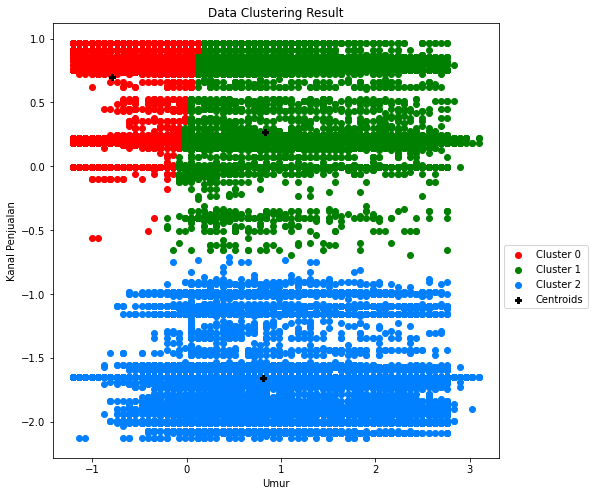

In [23]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df['Umur'][df['Cluster'] == i], 
        df['Kanal_Penjualan'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Umur")
plt.ylabel("Kanal Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

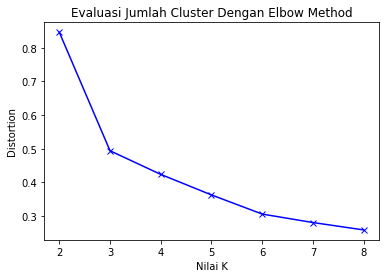

In [24]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()